In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import sys
sys.path.append('../0_python_modules/')
import extras

In [2]:
def clusters(hc,nids=range(2,11)):
    for h in nids:
        hl=extras.get_hc_dtraj(hc, h)
        print(h, {i:np.where(hl==i)[0].shape[0] for i in np.unique(hl)})
clusters(np.load('saved_furf/hc_permute.npy'))

2 {0: 130460, 1: 29269}
3 {0: 130460, 1: 264, 2: 29005}
4 {0: 264, 1: 29005, 2: 215, 3: 130245}
5 {0: 264, 1: 215, 2: 130245, 3: 7461, 4: 21544}
6 {0: 264, 1: 215, 2: 7461, 3: 21544, 4: 121220, 5: 9025}
7 {0: 264, 1: 215, 2: 7461, 3: 21544, 4: 121220, 5: 611, 6: 8414}
8 {0: 264, 1: 215, 2: 7461, 3: 21544, 4: 611, 5: 8414, 6: 291, 7: 120929}
9 {0: 264, 1: 215, 2: 7461, 3: 611, 4: 8414, 5: 291, 6: 120929, 7: 3706, 8: 17838}
10 {0: 215, 1: 7461, 2: 611, 3: 8414, 4: 291, 5: 120929, 6: 3706, 7: 17838, 8: 43, 9: 221}


In [2]:
lags = np.arange(5,70+1,5)

In [3]:
vall = np.load('saved_vamp/vamps_all.npy')

In [4]:
fsupervised = [ np.load(f'saved_supervised/fimp_supervised{i}.npy') for i in range(5)]
fsupervised = np.mean(fsupervised, axis=0), np.std(fsupervised, axis=0)

In [5]:
fpermute = [[np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy') for i in range(5)] for h in range(2,11)]
fpermute = np.mean(fpermute, axis=1), np.std(fpermute, axis=1)

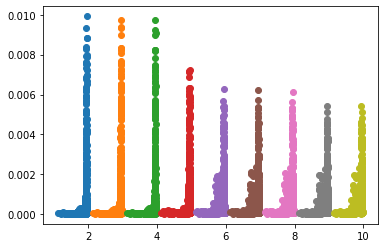

In [8]:
for h in range(2,11):plt.scatter(vall[:,0,0]+h-2, fpermute[0][h-2])

In [6]:
cmaps = mt.cm.get_cmap('Reds')

/tmp/ipykernel_1816847/4104700905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


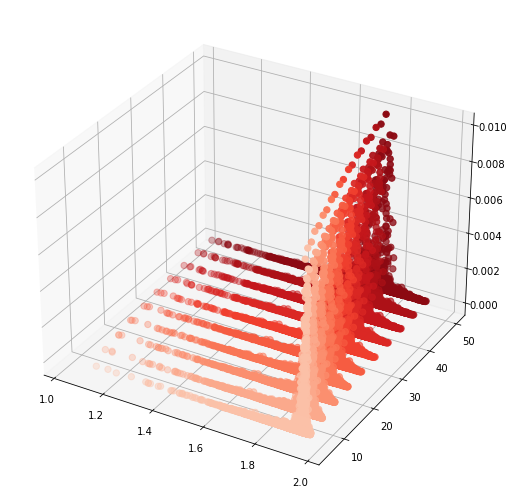

In [10]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i,0], [5*(i+1) for j in range(fpermute[0][0].shape[0])], fpermute[0][0],
                               color=cmaps((i+3)/13), s=40)
plt.show()

In [7]:
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=7
plt.rcParams['ytick.major.width']=2

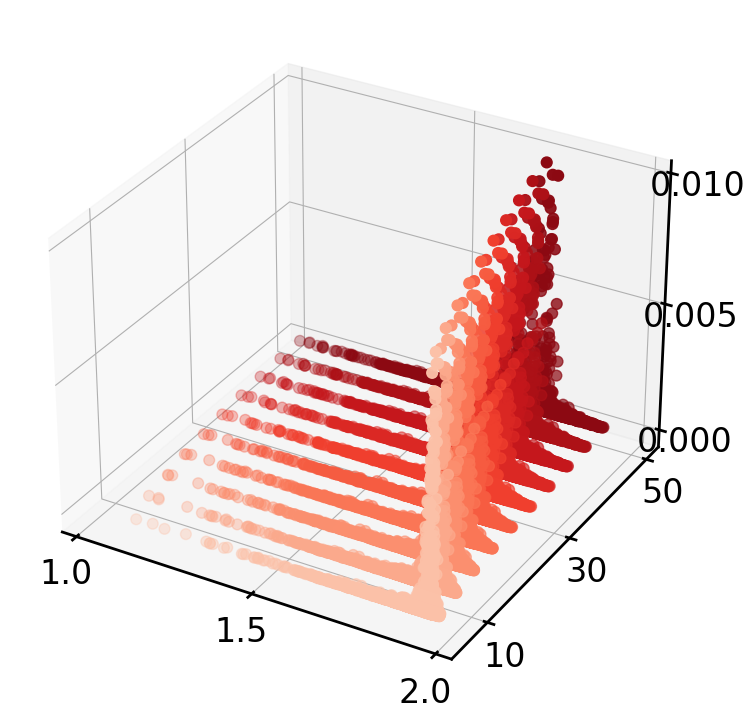

In [8]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i,0], [5*(i+1) for j in range(3741)], fpermute[0][1], 
                               color=cmaps((i+3)/13), s=60)
ax0.tick_params(labelsize=24)
ax0.set_xticks([1,1.5,2])
ax0.set_yticks([10,30,50])
ax0.set_zticks([0.0,0.005,0.01])
plt.savefig('plots/vamp2_urf3.pdf')
plt.show()